## [Bates (2010)](https://id.elsevier.com/as/0hdUy/resume/as/authorization.ping?acwCookieCreated=true&client_id=SDFE-v3&state=retryCounter%3D0%26csrfToken%3D6d97f3de-b34b-499e-8d5c-65f85b1c86dd%26idpPolicy%3Durn%253Acom%253Aelsevier%253Aidp%253Apolicy%253Aproduct%253Ainst_assoc%26returnUrl%3D%252Fscience%252Farticle%252Fpii%252FS0022169410001538%253Fvia%25253Dihub%26prompt%3Dnone%26cid%3Darp-2e3e6c91-ac86-4b32-8ed4-2f7765ce0ede)
Very rough... <br>
1D flux $q$ per unit width discretised, and with implit-scheme modification for improved stability:
$$q_{t+\Delta t} = \frac{q_t - gh_t \Delta t \frac{\Delta z}{\Delta x}}{1 + gh_t \Delta t n^2 q_t / h_t^{10/3}},$$
where $g$ is gravity, $\Delta t$ is the time step, $n$ is the Manning bottom roughness coefficient, and $h_t$ is the flow depth, or the average of the height, $\zeta_i$ at the centre of each grid cell. See also Leijnse (2020).

### Idea
Try to implement Eq (11) from Bates (2010) using convolution-style operations for a toy example.

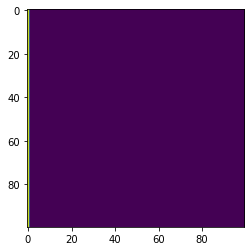

In [35]:
import numpy as np
import matplotlib.pyplot as plt

nsteps = 1000
n = 100
dx = 1
dt = 0.001
manning = 0.02
g = 9.8

# set up matrix and BCs
fmat = 1 + np.zeros((n, n))  # heights
fmat[:, 0] = 10
qmat = np.ones((n, n-1))  # flows
plt.imshow(fmat)

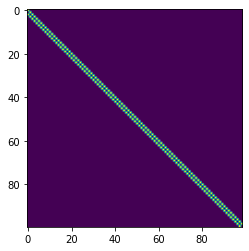

In [36]:
# set up 1D convolution operatinos
zkern = np.array([1 / dx, -1 / dx])  # forward Euler kernel
hkern = np.array([1 / 2, 1 / 2])     # average the heights
sumkern = np.array([1, 0, 1])

zconv = np.zeros((n, n-1))
hconv = np.zeros((n, n-1))
sumconv = np.zeros((n, n-1))

for i in range(n-1):
    zconv[i:i+2, i] = zkern
    hconv[i:i+2, i] = hkern
for i in range(n-2):
    sumconv[i:i + 3, i] = sumkern
sumconv[-2:, n-2] = sumkern[:2]
plt.imshow(sumconv)

In [37]:
fmats = [fmat]

for _ in range(nsteps):
    zmat = np.matmul(fmat, zconv)
    hmat = np.matmul(fmat, hconv)
    qmat = qmat[:, :n-1]
    qmat = (qmat - g * hmat * dt * zmat) / (1 + g * dt * manning**2 * qmat / hmat ** (10/3))
    fmat = np.matmul(sumconv, qmat.T).T  # transpose convolution
    fmats.append(fmat)

/var/folders/pw/g3l12fr515df7s6dpdch4qx00000gn/T/ipykernel_78594/1884040441.py:7: RuntimeWarning: invalid value encountered in power
  qmat = (qmat - g * hmat * dt * zmat) / (1 + g * dt * manning**2 * qmat / hmat ** (10/3))


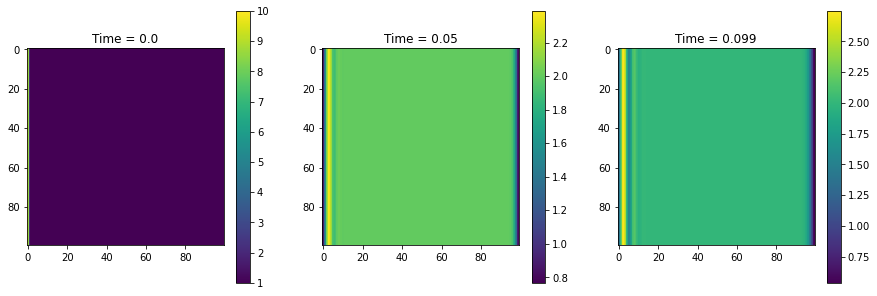

In [38]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

for i, im in enumerate([0, int(0.5 * n), n-1]):
    img = ax[i].imshow(fmats[im])
    plt.colorbar(img, ax=ax[i])
    ax[i].set_title(f"Time = {im*dt}")

In [ ]:
### Add quasi-2-D convolutions